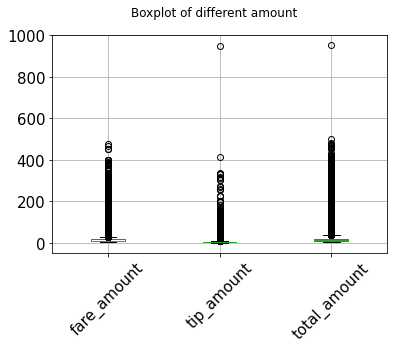

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# preprocess data
yellow_11 = pd.read_csv("large/yellow_tripdata_2018-11.csv")
cleaned_yellow_11 = yellow_11[yellow_11['passenger_count'].ne(0)]
cleaned_yellow_11 = cleaned_yellow_11[cleaned_yellow_11['trip_distance'].ne(float(0))]
cleaned_yellow_11 = cleaned_yellow_11[cleaned_yellow_11['payment_type'].eq(int(1))]
cleaned_yellow_11 = cleaned_yellow_11[cleaned_yellow_11['fare_amount'].ge(2.5)]
cleaned_yellow_11 = cleaned_yellow_11[cleaned_yellow_11['total_amount'].ge(2.5)]
cleaned_yellow_11 = cleaned_yellow_11[((cleaned_yellow_11['tpep_pickup_datetime'] < "2018-11-30 23:59:59")&(yellow_11['tpep_pickup_datetime'] > "2018-11-01 00:00:00"))]
cleaned_yellow_11 = cleaned_yellow_11[((cleaned_yellow_11['tpep_dropoff_datetime'] < "2018-11-30 23:59:59")&(yellow_11['tpep_dropoff_datetime'] > "2018-11-01 00:00:00"))]
# draw the original data and remove the outliers
amount = ['fare_amount','tip_amount','total_amount']
amount_boxplot=cleaned_yellow_11.boxplot(column=amount,rot=45, fontsize=15)
fig = amount_boxplot.get_figure()
fig.suptitle("Boxplot of different amount")
fig.show()
fig.savefig("Original plot of different amount.png")
Q1 = cleaned_yellow_11[amount].quantile(0.25)
Q3 = cleaned_yellow_11[amount].quantile(0.75)
IQR = Q3-Q1

#draw plot use this:cleaned = cleaned_yellow_11[((cleaned_yellow_11[amount].ge(Q1-3*IQR))&(cleaned_yellow_11[amount].le(Q3+3*IQR)))]
#new_boxplot=cleaned.boxplot(column=amount,rot=45, fontsize=15)
#fig = new_boxplot.get_figure()
#fig.suptitle("After Boxplot of different amount")
#fig.show()
#fig.savefig("After plot of different amount.png")
cleaned = cleaned_yellow_11[((cleaned_yellow_11[amount].ge(Q1-3*IQR))&(cleaned_yellow_11[amount].le(Q3+3*IQR))).any(axis=1)]
cleaned.reset_index().to_feather("2018_preprocessed_yellow_11.feather")